#### Import Libraries

In [6]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("HR_comma_sep.csv")
df.head(5)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [8]:
df.shape

(14999, 10)

In [9]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [10]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

#### Exploratory Data Analysis

In [12]:
#attrition rate 

(3571/14999) * 100 # 23% people left the org

23.80825388359224

In [13]:
df.groupby("left")[df.select_dtypes(include='number').columns].mean()

satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  left  \
left                                                                  
0               199.060203            3.380032       0.175009   0.0   
1               207.419210            3.876505       0.047326   1.0   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321

In [14]:
# Attrition Analysis

# 1. Satisfaction level is low for employee who left
# 2. Numbers of project handle by employees who left are high
# 3. Average monthly hours were 8% for employees who left
# 4. Promotion were low for employees who left

<Axes: xlabel='salary'>

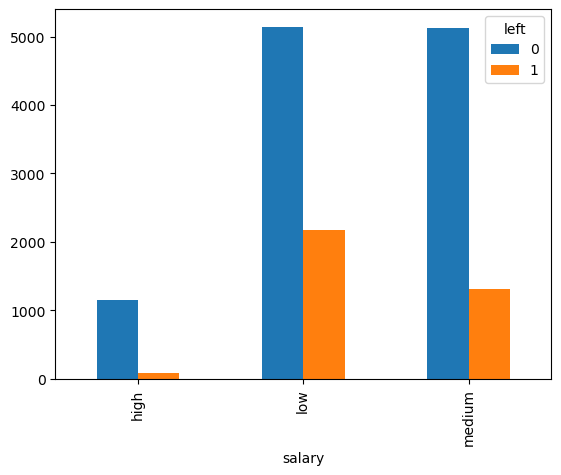

In [15]:
# Salary on retention 

pd.crosstab(df.salary, df.left).plot(kind='bar')

<Axes: xlabel='sales'>

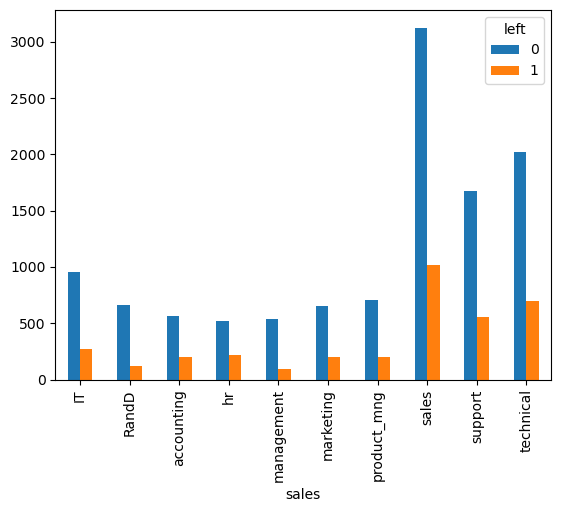

In [16]:
# Department to retention 

pd.crosstab(df.sales, df.left).plot(kind='bar')

<Axes: xlabel='sales'>

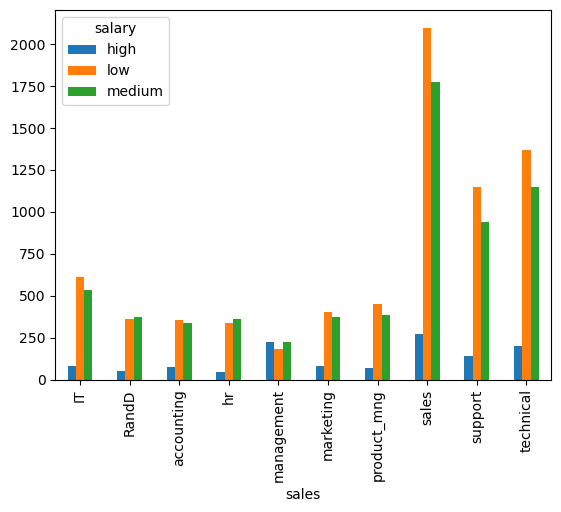

In [17]:
# Department to salary

pd.crosstab(df.sales, df.salary).plot(kind='bar')

#### Feature Engineering

In [19]:
sub_df = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
sub_df.head(5)

satisfaction_level  average_montly_hours  promotion_last_5years  salary
0                0.38                   157                      0     low
1                0.80                   262                      0  medium
2                0.11                   272                      0  medium
3                0.72                   223                      0     low
4                0.37                   159                      0     low

In [20]:
# convert categorical variable of 'salary' using one hot encoding

salary_dummies = pd.get_dummies(sub_df.salary, dtype=int, prefix='salary')

In [21]:
df_with_dummies = pd.concat([sub_df, salary_dummies],axis= 'columns')

In [22]:
df_with_dummies.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary  \
0                0.38                   157                      0     low   
1                0.80                   262                      0  medium   
2                0.11                   272                      0  medium   
3                0.72                   223                      0     low   
4                0.37                   159                      0     low   

   salary_high  salary_low  salary_medium  
0            0           1              0  
1            0           0              1  
2            0           0              1  
3            0           1              0  
4            0           1              0

In [23]:
#dropping salary column

df_with_dummies.drop('salary', axis='columns', inplace=True)
df_with_dummies.head(5)

satisfaction_level  average_montly_hours  promotion_last_5years  \
0                0.38                   157                      0   
1                0.80                   262                      0   
2                0.11                   272                      0   
3                0.72                   223                      0   
4                0.37                   159                      0   

   salary_high  salary_low  salary_medium  
0            0           1              0  
1            0           0              1  
2            0           0              1  
3            0           1              0  
4            0           1              0

In [24]:
# predicting variable

x = df_with_dummies
x.head(5)

satisfaction_level  average_montly_hours  promotion_last_5years  \
0                0.38                   157                      0   
1                0.80                   262                      0   
2                0.11                   272                      0   
3                0.72                   223                      0   
4                0.37                   159                      0   

   salary_high  salary_low  salary_medium  
0            0           1              0  
1            0           0              1  
2            0           0              1  
3            0           1              0  
4            0           1              0

In [25]:
#target variable

y = df.left
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

#### Model building

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [70]:
#Splitting data

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [72]:
#Scaled data

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [74]:
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
grid = GridSearchCV(logreg, param_grid=params, cv=5, scoring='precision')
grid.fit(x_train_scaled, y_train)

print("Best params:", grid.best_params_)
best_model = grid.best_estimator_

Best params: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}


In [75]:
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [84]:
# testing the model

x_test_scaled[14:20]

array([[ 1.35137823, -1.62231647, -0.14853057, -0.29987735,  1.02352866,
        -0.86699414],
       [ 0.18322122, -0.64137639, -0.14853057, -0.29987735,  1.02352866,
        -0.86699414],
       [-0.38071664,  0.17941021, -0.14853057, -0.29987735, -0.97701221,
         1.15341034],
       [-0.46127919, -0.42116535,  6.73262099,  3.33469669, -0.97701221,
        -0.86699414],
       [ 1.02912802, -0.56129965, -0.14853057, -0.29987735,  1.02352866,
        -0.86699414],
       [-1.54887364, -0.64137639, -0.14853057, -0.29987735, -0.97701221,
         1.15341034]])

In [86]:
y_test[14:20]

3899     0
13176    0
2128     0
11935    0
10736    0
9385     0
Name: left, dtype: int64

In [88]:
#predicting with the model
model.predict(x_test_scaled[14:20])

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [90]:
model.score(x_test_scaled, y_test)

0.7766666666666666

In [94]:
y_pred = best_model.predict(x_test_scaled)

In [96]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

print(classification_report(y_test, y_pred))
print("Precision (Attrition=1):", precision_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      2280
           1       0.45      0.73      0.55       720

    accuracy                           0.72      3000
   macro avg       0.67      0.72      0.67      3000
weighted avg       0.79      0.72      0.74      3000

Precision (Attrition=1): 0.4456706281833616


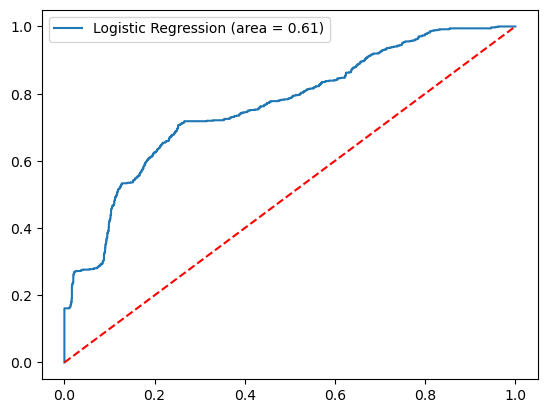

In [98]:
from sklearn.metrics import roc_auc_score, roc_curve

logit_roc_auc = roc_auc_score(y_test,model.predict(x_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.legend(loc='best')

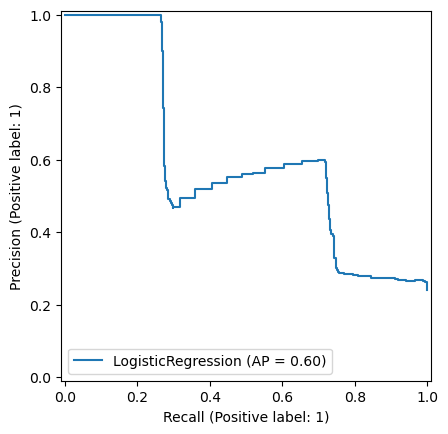

In [100]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(best_model, x_test_scaled, y_test)
plt.show()